<a href="https://colab.research.google.com/github/Ali-Fartout/Kaggle/blob/main/Tabular-Playground-Series-Mar-2022/Tabular-Playground-Series-Mar-2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Requirement

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json
! chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c tabular-playground-series-mar-2022

mkdir: cannot create directory ‘/root/.kaggle’: File exists
test.csv: Skipping, found more recently modified local copy (use --force to force download)
sample_submission.csv: Skipping, found more recently modified local copy (use --force to force download)
train.csv.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile("/content/train.csv.zip", "r")
zip_ref.extractall()
zip_ref.close()

# First Look

In [ ]:
import pandas as pd
import numpy as np

train_data = pd.read_csv('/content/train.csv',parse_dates=['time'])
test_data = pd.read_csv('/content/test.csv',parse_dates=['time'])

In [ ]:
train_data.head()

,row_id,time,x,y,direction,congestion
0,0,1991-04-01,0,0,EB,70
1,1,1991-04-01,0,0,NB,49
2,2,1991-04-01,0,0,SB,24
3,3,1991-04-01,0,1,EB,18
4,4,1991-04-01,0,1,NB,60


In [ ]:
for i in range(2,6):
  print(train_data.iloc[:,i].value_counts())
  print("###############################")

2    339534
1    287298
0    222003
Name: x, dtype: int64
###############################
2    235062
3    235062
1    208944
0    169767
Name: y, dtype: int64
###############################
EB    156708
NB    156708
SB    156708
WB    143649
NE     91413
SW     91413
NW     26118
SE     26118
Name: direction, dtype: int64
###############################
34    26498
40    19797
47    19418
29    19236
48    19013
      ...  
95      140
97      104
98       87
1        48
99       42
Name: congestion, Length: 101, dtype: int64
###############################


In [ ]:
train_data.isnull().any()

row_id        False
time          False
x             False
y             False
direction     False
congestion    False
dtype: bool

# EDA

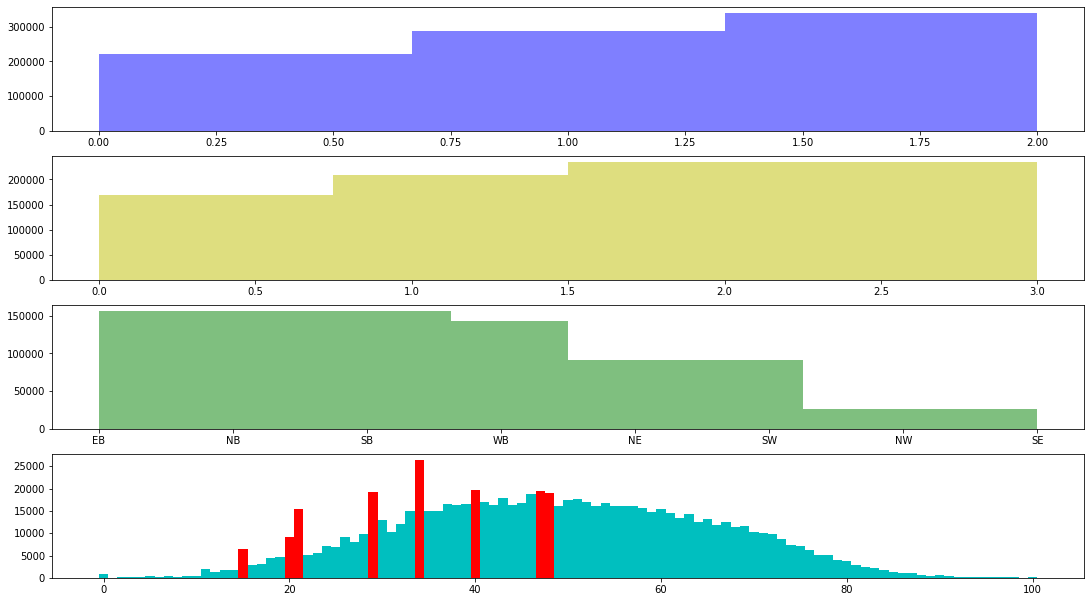

<Figure size 720x432 with 0 Axes>

In [50]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(4)
plt.figure(figsize=(10, 6))
color = ['blue','y','green']
fig.set_size_inches(18.5, 10.5)
for i in range(0,3):
  axs[i].hist(train_data.iloc[:,i+2], train_data.iloc[:,i+2].value_counts().shape[0], facecolor=color[i], alpha=0.5)

axs[3].bar(range(101), train_data.congestion.value_counts().sort_index(), width=1,
        color=['r' if con in [15, 20, 21, 29, 34,40,47,48] else 'c' for con in range(101)])

plt.show()


**"X" and "Y" are in good situation**

**"Direction" needs a little change, cause we have "skewed right" distribution**

**And for "Congestion" we can drop these red line for balance data**

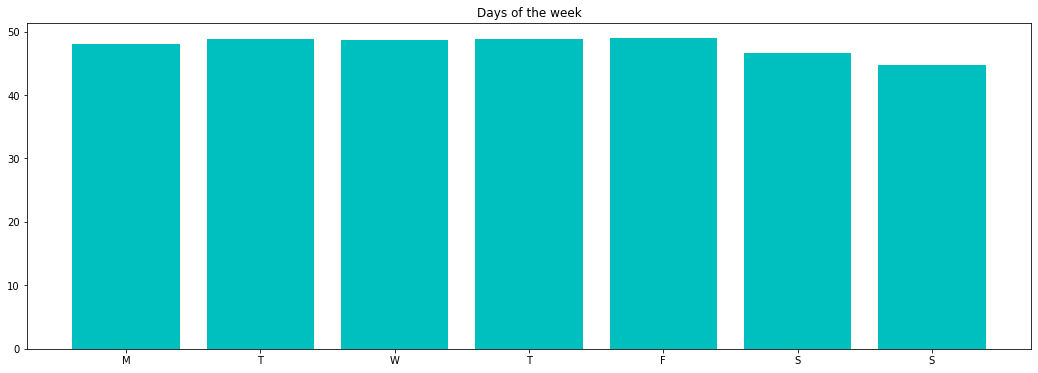

In [41]:
temp = train_data.groupby(train_data.time.dt.dayofweek).congestion.mean()
plt.figure(figsize=(18, 6))
plt.title('Days of the week')
plt.bar(temp.index, temp, color='c')
plt.xticks(ticks=temp.index, labels='MTWTFSS')
plt.show()

(40.0, 52.0)

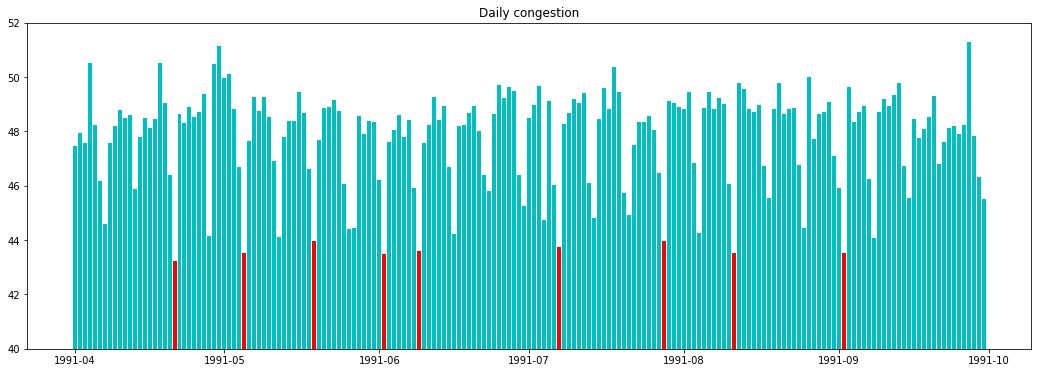

In [48]:
temp = train_data.groupby(train_data.time.dt.date).congestion.mean()
plt.figure(figsize=(18, 6))
plt.title('Daily congestion')
plt.bar(temp.index, temp, color=['r' if con <= 44 else 'c' for con in temp[range(temp.shape[0])]])
plt.ylim(40, 52)

*The red lines are times that we had just a little traffic, maybe these days were  holidays or other something else!*

**Maybe we should drop these days.**